# Imports

In [1]:
import pandas as pd
from data_visualization import *
from tqdm import tqdm

def drop_from_interval(df: pd.DataFrame, min_interval: float, max_interval: float, n_samples_to_drop: int) -> pd.DataFrame:
    tmp = df[df['a%'] >= min_interval]
    if max_interval == 1:
        tmp = tmp[tmp['a%'] <= max_interval]
    else:
        tmp = tmp[tmp['a%'] < max_interval]
    to_drop_rows = tmp.sample(n_samples_to_drop)
    to_drop = list(to_drop_rows.index)

    return df.drop(to_drop), to_drop_rows

def augment_interval(df_old: pd.DataFrame, df_for_augmentation: pd.DataFrame, min_interval: float, max_interval: float, n_samples_to_add: int) -> pd.DataFrame:
    tmp = df_for_augmentation[df_for_augmentation['a%'] >= min_interval]
    if max_interval == 1:
        tmp = tmp[tmp['a%'] <= max_interval]
    else:
        tmp = tmp[tmp['a%'] < max_interval]
    tmp = tmp.sample(n_samples_to_add)
    result = pd.concat([df_old, tmp], axis=0)
    return result

def get_table_set(df: pd.DataFrame) -> set:
    out = []
    for r in tqdm(range(df.shape[0])):
        out.append(df.iloc[r]['r_id'])
        out.append(df.iloc[r]['s_id'])
    return set(out)

def check_no_repetitions(s1: set, s2: set) -> bool:
    for t in tqdm(s1):
        if t in s2:
            return True
    return False

def get_couple_set(df: pd.DataFrame) -> set:
    out = []
    for r in range(df.shape[0]):
        tmp1 = (df.iloc[r]['r_id'], df.iloc[r]['s_id'])
        tmp2 = (df.iloc[r]['s_id'], df.iloc[r]['r_id'])
        out.append(tmp1)
        out.append(tmp2)
    return set(out)

def drop_duplicate_samples(pivot: pd.DataFrame, target: pd.DataFrame) -> pd.DataFrame:
    print('Generating pivot couple set')
    pivot_couple_set = get_couple_set(pivot)

    print('Generating target couple set')
    target_couple_set = get_couple_set(target)

    samples_to_drop = []

    print('Generating Samples to drop list')
    for t in target_couple_set:
        if t in pivot_couple_set:
            samples_to_drop.append(t)
    
    samples_to_drop = set(samples_to_drop)

    print('Generating rows to drop list')
    rows_to_drop = []
    for r in range(target.shape[0]):
        tmp1 = (target.iloc[0]['r_id'], target.iloc[0]['s_id'])
        tmp2 = (target.iloc[0]['s_id'], target.iloc[0]['r_id'])
        if (tmp1 in samples_to_drop) or (tmp2 in samples_to_drop):
            rows_to_drop.append(r)

    print('Dropping rows')
    out = target.drop(rows_to_drop)

    return out

def remove_exact_matches(df: pd.DataFrame):
    out = df[df['a%']!=1]
    return out

Preliminar

Fixing tuples for data augmentation

Train

In [4]:
t1 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/train_stats_200000.csv')
t2 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/train_stats_400000.csv')
t3 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/train_stats_600000.csv')
t4 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/train_stats_800000.csv')
t5 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/train_stats_1000000.csv')

In [5]:
result = pd.concat([t1, t2, t3, t4, t5], axis=0)

In [6]:
result= result.drop('id', axis=1)
result= result.drop('total_time', axis=1)

In [7]:
result.head(5)

,r_id,s_id,a%
0,id_csv_licensed.zip_PD36713b_lo024.sample.dupm...,id_csv_licensed.zip_PD36717b_lo019.sample.dupm...,0.500000
1,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.160000
2,show_time_csv_licensed.zip_text_120.csv,then_csv_licensed.zip_text_617.csv,1.000000
3,quick_time_csv_licensed.zip_recipe_1810.csv,quick_time_csv_licensed.zip_recipe_698.csv,0.933333
4,then_csv_licensed.zip_0130_16.csv,then_csv_licensed.zip_0130_19.csv,1.000000


In [8]:
result.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/train_unbalanced.csv', index=False)

In [9]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/test_stats_200000.csv').drop('id',axis=1).to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/test_unbalanced.csv', index=False)

In [10]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/valid_stats_200000.csv').drop('id',axis=1).to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/valid_unbalanced.csv', index=False)

Test

In [11]:
te1 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/test_stats_200000.csv')
te2 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/test_stats_300000.csv')
te3 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/test_stats_500000.csv')
te4 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/test_stats_600000.csv')

tetot = result = pd.concat([te1, te2, te3, te4], axis=0)

result_te= tetot.drop('id', axis=1)
result_te['a%'] = result_te['a%'].fillna(0)

result_te.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/test_unbalanced.csv', index=False)

In [12]:
ttttest = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/test_unbalanced.csv')

In [13]:
ttttest

,r_id,s_id,a%,total_time
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.030304
1,seek_time_csv_licensed.zip_PL2331LAHDHAMJ.csv,seek_time_csv_licensed.zip_PL2331LAHDR9BJ.csv,0.578947,0.006878
2,then_csv_licensed.zip_03-04_703.csv,thing_csv_licensed.zip_03-04_776.csv,0.818182,0.003441
3,real_time_csv_licensed.zip_0203_202927_Initial...,real_time_csv_licensed.zip_0225_050914_Initial...,0.500000,0.000388
4,in_time_csv_licensed.zip_0222_185053_Initializ...,real_time_csv_licensed.zip_0210_162008_Initial...,0.500000,0.000382
...,...,...,...,...
530435,in_time_csv_licensed.zip_0211_050816_Initializ...,real_time_csv_licensed.zip_0209_164244_Initial...,0.500000,0.000472
530436,then_csv_licensed.zip_Gibarch 3 sides - DE dea...,then_csv_licensed.zip_Gibarch 3 sides - resour...,0.984000,0.000308
530437,in_time_csv_licensed.zip_0210_031124_Initializ...,real_time_csv_licensed.zip_0204_163142_Initial...,0.500000,0.000402
530438,object_csv_licensed.zip_00009-832.csv,object_csv_licensed.zip_00017-145.csv,0.424242,0.001327


Valid

In [14]:
v1 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/valid_stats_200000.csv')
v2 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/valid_stats_300000.csv')
v3 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/valid_stats_500000.csv')
v4 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/valid_stats_600000.csv')

vtot = result = pd.concat([v1, v2, v3, v4], axis=0)

result_v= vtot.drop('id', axis=1)
result_v['a%'] = result_v['a%'].fillna(0)

result_v.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/valid_unbalanced.csv', index=False)

In [15]:
vvvvalid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/valid_unbalanced.csv')
vvvvalid

,r_id,s_id,a%,total_time
0,seek_time_csv_licensed.zip_PL1331LAGTX0SH.csv,seek_time_csv_licensed.zip_PL2331LAGUH0VJ.csv,0.526316,15.592031
1,real_time_csv_licensed.zip_0131_173300_Initial...,real_time_csv_licensed.zip_0202_065558_Initial...,0.500000,0.000429
2,seek_time_csv_licensed.zip_PL1331LAGTX7DH.csv,seek_time_csv_licensed.zip_PL2331LAGPXHRJ.csv,0.526316,0.025076
3,id_csv_licensed.zip_language_8046.csv,id_csv_licensed.zip_language_8212.csv,1.000000,0.003401
4,id_csv_licensed.zip_ir.model.access_37492.csv,id_csv_licensed.zip_ir.model.access_37824.csv,1.000000,0.000401
...,...,...,...,...
529814,seek_time_csv_licensed.zip_PL1331LAGSEA1H.csv,seek_time_csv_licensed.zip_PL2331LAGUM22J.csv,0.526316,17.484279
529815,in_time_csv_licensed.zip_0208_233254_Initializ...,real_time_csv_licensed.zip_0208_154109_Initial...,0.500000,0.000458
529816,id_csv_licensed.zip_technician_shifts_20.csv,id_csv_licensed.zip_technician_shifts_347.csv,0.400000,0.001169
529817,id_csv_licensed.zip_0021600976.csv,id_csv_licensed.zip_10.1038_ncomms8541.csv,0.018519,11.939466


???????????????????????

In [16]:
test_unbalanced = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/test_unbalanced.csv')
test_unbalanced = test_unbalanced.drop('total_time', axis=1)
test_unbalanced['a%'] = test_unbalanced['a%'].fillna(0)

test_data_augm = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/lsh_candidates/test_stats_300000.csv')
test_data_augm = test_data_augm.drop('total_time', axis=1)
test_data_augm = test_data_augm.drop('id', axis=1)

# Gittables

In [10]:
def drop_from_interval(df: pd.DataFrame, min_interval: float, max_interval: float, n_samples_to_drop: int) -> pd.DataFrame:
    tmp = df[df['a%'] >= min_interval]
    if max_interval == 1:
        tmp = tmp[tmp['a%'] <= max_interval]
    else:
        tmp = tmp[tmp['a%'] < max_interval]
    to_drop_rows = tmp.sample(n_samples_to_drop)
    to_drop = list(to_drop_rows.index)

    return df.drop(to_drop), to_drop_rows

def augment_interval(df_old: pd.DataFrame, df_for_augmentation: pd.DataFrame, min_interval: float, max_interval: float, n_samples_to_add: int) -> pd.DataFrame:
    tmp = df_for_augmentation[df_for_augmentation['a%'] >= min_interval]
    if max_interval == 1:
        tmp = tmp[tmp['a%'] <= max_interval]
    else:
        tmp = tmp[tmp['a%'] < max_interval]
    tmp = tmp.sample(n_samples_to_add)
    result = pd.concat([df_old, tmp], axis=0)
    return result

def get_table_set(df: pd.DataFrame) -> set:
    out = []
    for r in tqdm(range(df.shape[0])):
        out.append(df.iloc[r]['r_id'])
        out.append(df.iloc[r]['s_id'])
    return set(out)

def check_no_repetitions(s1: set, s2: set) -> bool:
    for t in tqdm(s1):
        if t in s2:
            return True
    return False

def get_couple_set(df: pd.DataFrame) -> set:
    out = []
    for r in range(df.shape[0]):
        tmp1 = (df.iloc[r]['r_id'], df.iloc[r]['s_id'])
        tmp2 = (df.iloc[r]['s_id'], df.iloc[r]['r_id'])
        out.append(tmp1)
        out.append(tmp2)
    return set(out)

def drop_duplicate_samples(pivot: pd.DataFrame, target: pd.DataFrame) -> pd.DataFrame:
    print('Generating pivot couple set')
    pivot_couple_set = get_couple_set(pivot)

    print('Generating target couple set')
    target_couple_set = get_couple_set(target)

    samples_to_drop = []

    print('Generating Samples to drop list')
    for t in target_couple_set:
        if t in pivot_couple_set:
            samples_to_drop.append(t)
    
    samples_to_drop = set(samples_to_drop)

    print('Generating rows to drop list')
    rows_to_drop = []
    for r in range(target.shape[0]):
        tmp1 = (target.iloc[0]['r_id'], target.iloc[0]['s_id'])
        tmp2 = (target.iloc[0]['s_id'], target.iloc[0]['r_id'])
        if (tmp1 in samples_to_drop) or (tmp2 in samples_to_drop):
            rows_to_drop.append(r)

    print('Dropping rows')
    out = target.drop(rows_to_drop)

    return out


## Data Augmentation Data Generation

In [23]:
train_tables = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/train_unbalanced_not_augmented.csv')
test_tables = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/test_unbalanced_not_augmented.csv')
valid_tables = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/valid_unbalanced_not_augmented.csv')

In [24]:
train_tables_set = get_table_set(train_tables)
test_tables_set = get_table_set(test_tables)
valid_tables_set = get_table_set(valid_tables)

  0%|          | 1562/408450 [00:00<00:26, 15610.52it/s]

100%|██████████| 96790/96790 [00:05<00:00, 16599.17it/s]


In [25]:
check_no_repetitions(train_tables_set, test_tables_set)

100%|██████████| 156191/156191 [00:00<00:00, 3205569.08it/s]


False

In [26]:
check_no_repetitions(train_tables_set, valid_tables_set)

100%|██████████| 156191/156191 [00:00<00:00, 3237601.80it/s]


False

In [27]:
check_no_repetitions(valid_tables_set, test_tables_set)

100%|██████████| 45127/45127 [00:00<00:00, 2868084.32it/s]


False

In [28]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_tables_set.pkl', 'wb') as f:
    pickle.dump(train_tables_set,f)

with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_tables_set.pkl', 'wb') as f:
    pickle.dump(test_tables_set,f)

with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/valid_tables_set.pkl', 'wb') as f:
    pickle.dump(valid_tables_set,f)

In [29]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_tables_set.pkl', 'rb') as f:
    train_tables_set = pickle.load(f)

with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_tables_set.pkl', 'rb') as f:
    test_tables_set = pickle.load(f)

with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/valid_tables_set.pkl', 'rb') as f:
    valid_tables_set = pickle.load(f)

## Train

In [43]:
train_unbalanced = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/train_unbalanced.csv')
#train_unbalanced = train_unbalanced.drop('total_time', axis=1)
train_unbalanced['a%'] = train_unbalanced['a%'].fillna(0)

In [44]:
train_unbalanced

,r_id,s_id,a%
0,id_csv_licensed.zip_PD36713b_lo024.sample.dupm...,id_csv_licensed.zip_PD36717b_lo019.sample.dupm...,0.500000
1,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.160000
2,show_time_csv_licensed.zip_text_120.csv,then_csv_licensed.zip_text_617.csv,1.000000
3,quick_time_csv_licensed.zip_recipe_1810.csv,quick_time_csv_licensed.zip_recipe_698.csv,0.933333
4,then_csv_licensed.zip_0130_16.csv,then_csv_licensed.zip_0130_19.csv,1.000000
...,...,...,...
999995,in_time_csv_licensed.zip_es_gt_103.csv,lead_time_csv_licensed.zip_es-GT_168.csv,0.555556
999996,seek_time_csv_licensed.zip_PL1331LAGSB9JH.csv,seek_time_csv_licensed.zip_PL2331LAGPJJHJ.csv,0.526316
999997,in_time_csv_licensed.zip_0224_110026_Initializ...,real_time_csv_licensed.zip_0210_011459_Initial...,0.500000
999998,object_csv_licensed.zip_temperature_526.csv,object_csv_licensed.zip_temperature_55.csv,0.923077


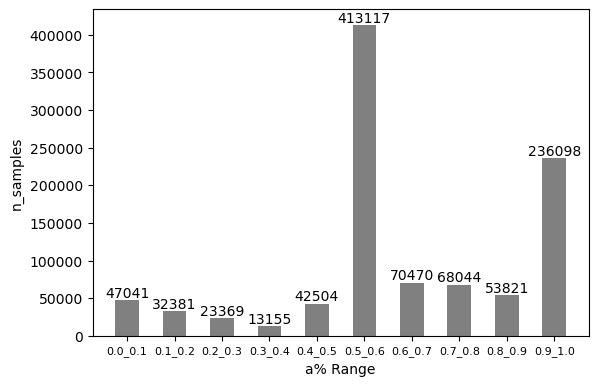

In [45]:
plot_data_distribution(train_unbalanced, 'a%')

Cutting columns that are too high

In [46]:
train_2 = drop_from_interval(train_unbalanced, 0.5, 0.6, 363_117)[0]

In [47]:
train_3 = drop_from_interval(train_2, 0.6, 0.7, 20_470)[0]

In [48]:
train_4, dropped_78 = drop_from_interval(train_3, 0.7, 0.8, 18_044) ##

In [49]:
train_5, dropped_79 = drop_from_interval(train_4, 0.8, 0.9, 3_821) ##

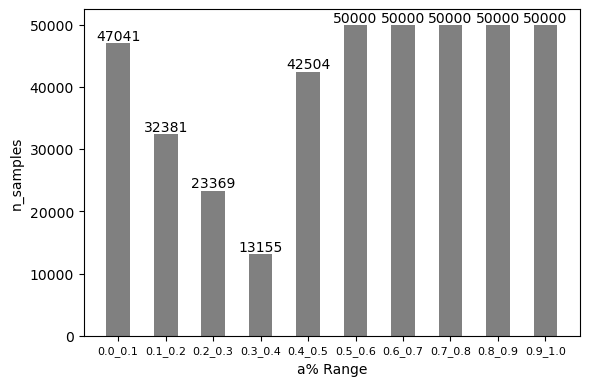

In [50]:
train_6 = drop_from_interval(train_5, 0.9, 1, 186_098)[0]
plot_data_distribution(train_6, 'a%')

In [51]:
train_6.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/train_unbalanced_not_augmented.csv', index=False)

Data augmentation

In [69]:
augm_train_1 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_stats_1000000.csv')
augm_train_2 = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_stats_2000000.csv')
augm_train = pd.concat([augm_train_1, augm_train_2], axis=0)
augm_train = augm_train.drop('total_time', axis=1)
augm_train = augm_train.drop('id', axis=1)
augm_train['a%'] = augm_train['a%'].fillna(0)
augm_train = drop_duplicate_samples(train_6, augm_train)
augm_train.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_stats_concat.csv', index=False)
augm_train = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/train_stats_concat.csv')

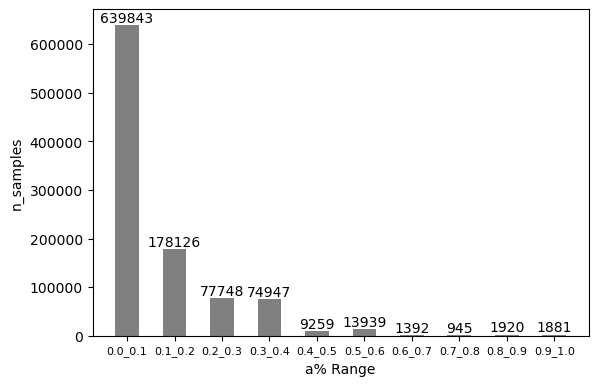

In [86]:
plot_data_distribution(augm_train, 'a%')

In [87]:
train_augmented = augment_interval(train_6, augm_train, 0,0.1,2_959)
train_augmented = augment_interval(train_augmented, augm_train, 0.1, 0.2, 17_619)
train_augmented = augment_interval(train_augmented, augm_train, 0.2, 0.3, 26_631)
train_augmented = augment_interval(train_augmented, augm_train, 0.3, 0.4, 36_845)
train_augmented = augment_interval(train_augmented, augm_train, 0.4, 0.5, 7_496)

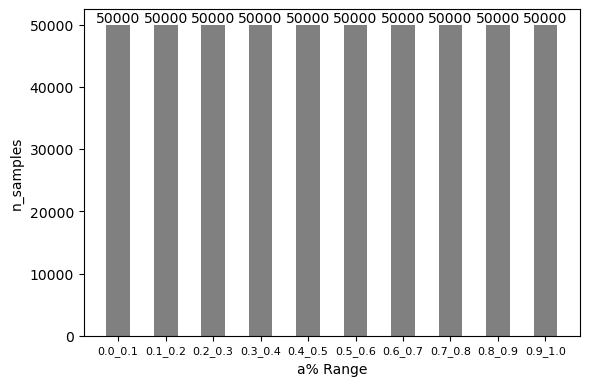

In [88]:
plot_data_distribution(train_augmented, 'a%')

In [ ]:
train_augmented.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/train.csv', index=False)

## Fixing broken triples:

In [6]:
train_data_filtered = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/train_filtered.csv')

In [7]:
train_data_filtered

,r_id,s_id,a%,total_time
0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.160000,0.001779
1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.818182,0.003602
2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.500000,0.000386
3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.724490,0.002438
4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.457143,0.003126
...,...,...,...,...
497338,running_time_csv_licensed.zip_00-01_520.csv,real_time_csv_licensed.zip_21-22_350.csv,0.428422,0.003989
497339,rate_of_return_csv_licensed.zip_03-04_111.csv,reaction_time_csv_licensed.zip_13-14_109.csv,0.409541,0.003451
497340,then_csv_licensed.zip_10-11_1084.csv,question_time_csv_licensed.zip_19-20_441.csv,0.404656,0.003126
497341,question_time_csv_licensed.zip_06-07_623.csv,whole_csv_licensed.zip_06-07_429.csv,0.440771,0.002572


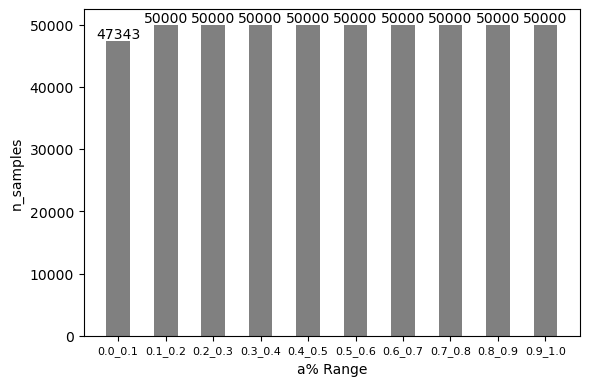

In [8]:
plot_data_distribution(train_data_filtered)

In [9]:
train_data_for_augmentation = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/train_stats_data_augmentation_seeds.csv')

In [10]:
train_data_for_augmentation.shape

(1000000, 6)

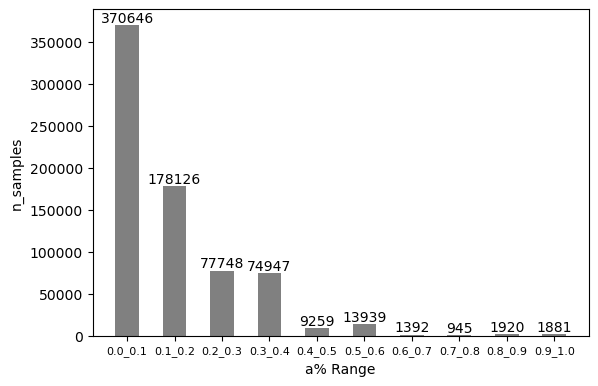

In [11]:
plot_data_distribution(train_data_for_augmentation)

In [12]:
train_data_for_augmentation

,id,r_id,s_id,seeds,a%,total_time
0,0,incubation_period_csv_licensed.zip_North Carol...,id_csv_licensed.zip_2017-01-03_00_00_00_25.csv,120,0.142857,0.011752
1,1,parent_csv_licensed.zip_Configuration1_window1...,thing_csv_licensed.zip_11-12_330.csv,42,0.176904,0.008671
2,2,object_csv_licensed.zip_Programming Language S...,object_csv_licensed.zip_TAH.csv,0,NaN,NaN
3,3,processing_time_csv_licensed.zip_P11-1061.annv...,object_csv_licensed.zip_18-19_82.csv,6,0.181818,0.001775
4,4,id_csv_licensed.zip_32661_2.csv,id_csv_licensed.zip_berry_flavors_22.csv,3,0.081454,0.001527
...,...,...,...,...,...,...
999995,999995,parent_csv_licensed.zip_09-10_459.csv,then_csv_licensed.zip_CNN.201602.csv,2,0.018182,0.000601
999996,999996,running_time_csv_licensed.zip_04-05_785.csv,lead_time_csv_licensed.zip_00-01_299.csv,15,0.319290,0.004209
999997,999997,id_csv_licensed.zip_ir.model.access_91643.csv,object_csv_licensed.zip_MapsMigPlugin.dll.csv_...,0,NaN,NaN
999998,999998,id_csv_licensed.zip_ir.model.access_91003.csv,show_time_csv_licensed.zip_10-11_1019.csv,7,0.125000,0.001630


In [9]:
train_data_for_augmentation = drop_duplicate_samples(train_data_filtered, train_data_for_augmentation)

Generating pivot couple set
Generating target couple set
Generating Samples to drop list
Generating rows to drop list
Dropping rows


In [10]:
train_data_for_augmentation.shape

(1000000, 6)

In [14]:
train_data_for_augmentation = train_data_for_augmentation[train_data_for_augmentation['seeds']==0]

In [18]:
train_data_for_augmentation

,id,r_id,s_id,seeds,a%,total_time
2,2,object_csv_licensed.zip_Programming Language S...,object_csv_licensed.zip_TAH.csv,0,NaN,NaN
5,5,id_csv_licensed.zip_Configuration1_window9_spl...,id_csv_licensed.zip_fleet_permission_11.csv,0,NaN,NaN
7,7,lead_time_csv_licensed.zip_EMFCompare_2016-01-...,seek_time_csv_licensed.zip_PL1331LAHD3KRH.csv,0,NaN,NaN
11,11,parent_csv_licensed.zip_Configuration1_window1...,in_time_csv_licensed.zip_0202_031440_Initializ...,0,NaN,NaN
12,12,sampling_rate_csv_licensed.zip_EDSD.d01b_6.csv,id_csv_licensed.zip_berry_flavors_87.csv,0,NaN,NaN
...,...,...,...,...,...,...
999968,999968,show_time_csv_licensed.zip_it-IT_50.csv,real_time_csv_licensed.zip_Tiny_YOLO-v2_283.csv,0,NaN,NaN
999969,999969,data_rate_csv_licensed.zip_nphoton-volume13-is...,living_thing_csv_licensed.zip_JLPT3.csv,0,NaN,NaN
999977,999977,thing_csv_licensed.zip_dictEpisode-5-Hinode-Br...,miles_per_hour_csv_licensed.zip_00-01_25.csv,0,NaN,NaN
999993,999993,real_time_csv_licensed.zip_0204_093259_Initial...,real_time_csv_licensed.zip_02-03_498.csv,0,NaN,NaN


In [19]:
pd.isna(train_data_for_augmentation['a%']).sum()

268332

In [22]:
train_data_for_augmentation = train_data_for_augmentation[pd.isna(train_data_for_augmentation['a%'])]
train_data_for_augmentation['a%'] = train_data_for_augmentation['a%'].fillna(0)
train_data_for_augmentation.shape

(268332, 6)

In [24]:
train_data_for_augmentation['seeds'].sum()

0

In [31]:
train_data_for_augmentation = train_data_for_augmentation.drop(['id', 'seeds'], axis=1)

In [32]:
train_data_augmented = augment_interval(train_data_filtered, train_data_for_augmentation, 0, 0.1, 2_657)

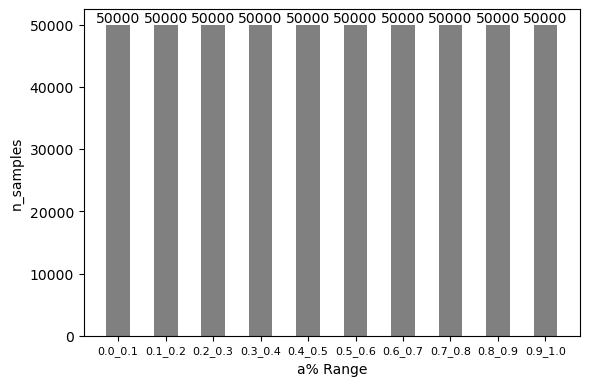

In [33]:
plot_data_distribution(train_data_augmented)

In [35]:
pd.isna(train_data_augmented['a%']).sum()

0

In [36]:
train_data_augmented.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/train_filtered_augmented.csv', index=False)

## Building training dataset without perfect matches

In [3]:
df_with_ones = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/train_filtered_augmented.csv')

In [4]:
df_no_ones = remove_exact_matches(df_with_ones)

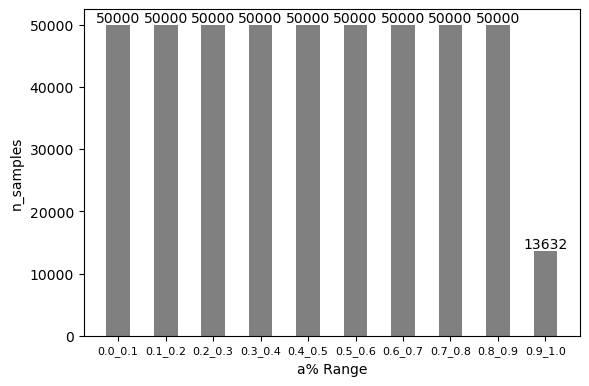

In [5]:
plot_data_distribution(df_no_ones)

In [26]:
df_no_ones

,r_id,s_id,a%,total_time
0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.160000,0.001779
1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.818182,0.003602
2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.500000,0.000386
3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.724490,0.002438
4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.457143,0.003126
...,...,...,...,...
499995,show_time_csv_licensed.zip_1987-02-28_5.csv,real_time_csv_licensed.zip_Inception-v2_203.csv,0.000000,NaN
499996,lead_time_csv_licensed.zip_2017恋练有词考研词组背多分.csv,object_csv_licensed.zip_TotalResultsofRhino.v1...,0.000000,NaN
499997,object_csv_licensed.zip_funcs_by_name_161.csv,then_csv_licensed.zip_17-18_431.csv,0.000000,NaN
499998,speed_of_light_csv_licensed.zip_funcs_by_addre...,inflation_rate_csv_licensed.zip_011-DA_User_ba...,0.000000,NaN


In [12]:
data_augm = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/train_stats_banding_seeds.csv')

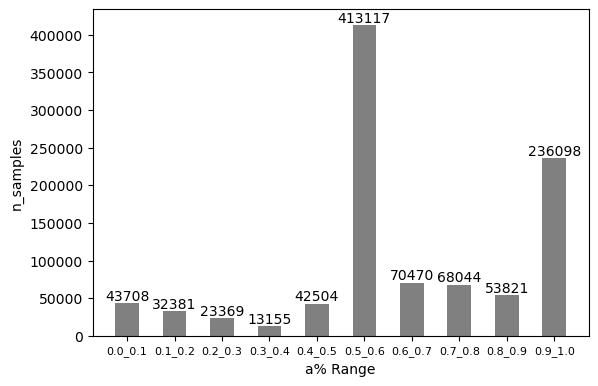

In [13]:
plot_data_distribution(data_augm)

In [14]:
data_augm = remove_exact_matches(data_augm)

In [16]:
data_augm = data_augm[data_augm['a%']>=0.9]

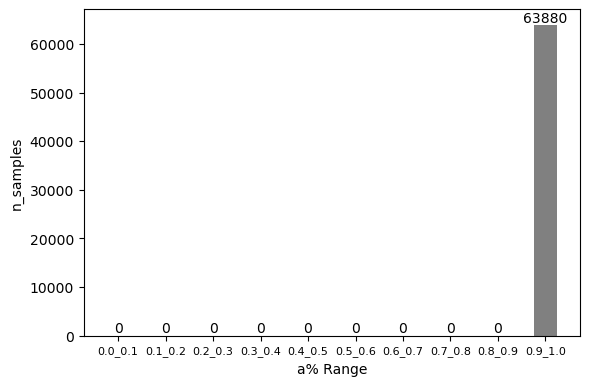

In [20]:
plot_data_distribution(data_augm)

In [18]:
data_augm = drop_duplicate_samples(df_no_ones, data_augm)

Generating pivot couple set
Generating target couple set
Generating Samples to drop list
Generating rows to drop list
Dropping rows


In [22]:
data_augm.describe()

,id,seeds,a%,total_time
count,63880.000000,63880.000000,63880.000000,63880.000000
mean,498302.284424,80.811365,0.931799,0.053278
std,288198.901679,1230.420621,0.027003,1.229425
min,3.000000,1.000000,0.900000,0.000085
25%,247221.250000,2.000000,0.909091,0.000916
50%,496596.000000,21.000000,0.928571,0.001213
75%,747291.000000,40.000000,0.942368,0.002899
max,999998.000000,274074.000000,0.999594,61.631011


In [31]:
data_augm = data_augm.drop(columns=['id', 'seeds','total_time'])

In [32]:
df_no_ones_balanced = augment_interval(df_no_ones, data_augm, 0.9, 1, 36_368)

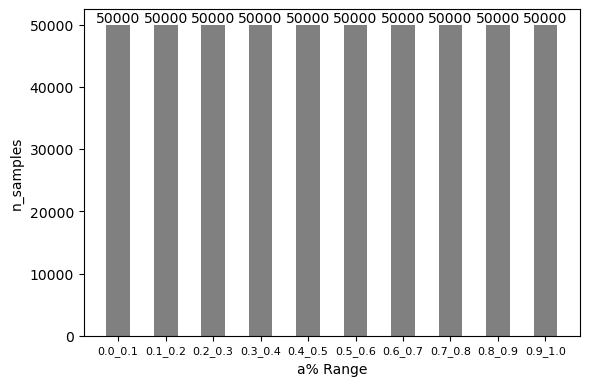

In [35]:
plot_data_distribution(df_no_ones_balanced)

In [36]:
df_no_ones_balanced.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/train_no_perfect_matches.csv', index=False)

## Test

In [4]:
test_unbalanced = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/test_unbalanced.csv')
test_unbalanced = test_unbalanced.drop('total_time', axis=1)
test_unbalanced['a%'] = test_unbalanced['a%'].fillna(0)

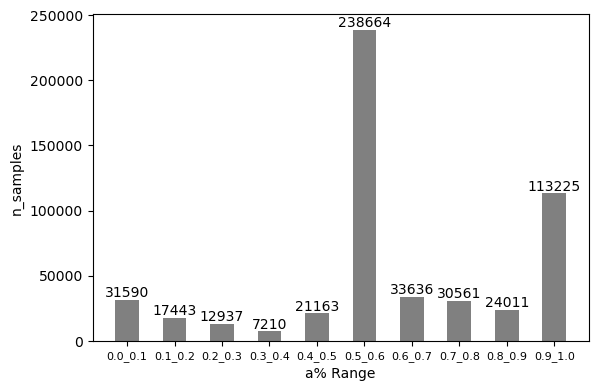

In [5]:
plot_data_distribution(test_unbalanced, 'a%')

In [10]:
test_2 = drop_from_interval(test_unbalanced, 0, 0.1, 21_590)[0]
test_2 = drop_from_interval(test_2, 0.1, 0.2, 7_443)[0]
test_2 = drop_from_interval(test_2, 0.2, 0.3, 2_937)[0]
test_2 = drop_from_interval(test_2, 0.4, 0.5, 11_163)[0]
test_3 = drop_from_interval(test_2, 0.5, 0.6, 228_664)[0]
test_4 = drop_from_interval(test_3, 0.6, 0.7, 23_636)[0]
test_5 = drop_from_interval(test_4, 0.7, 0.8, 20_561)[0]
test_6 = drop_from_interval(test_5, 0.8, 0.9, 14_011)[0]
test_6 = drop_from_interval(test_6, 0.9, 1, 103_225)[0]

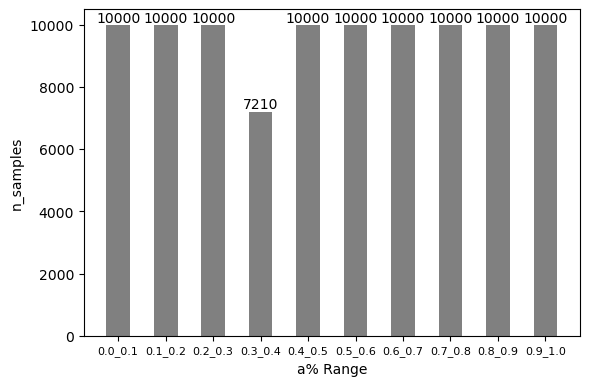

In [11]:
plot_data_distribution(test_6, 'a%')

Data augmentation

In [15]:
augm_test= pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_stats_500000.csv')
augm_test = augm_test.drop('total_time', axis=1)
augm_test = augm_test.drop('id', axis=1)
augm_test['a%'] = augm_test['a%'].fillna(0)
augm_test = drop_duplicate_samples(test_6, augm_test)
augm_test.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_stats_cleaned.csv', index=False)
augm_test = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_stats_cleaned.csv')

Generating pivot couple set
Generating target couple set
Generating Samples to drop list
Generating rows to drop list
Dropping rows


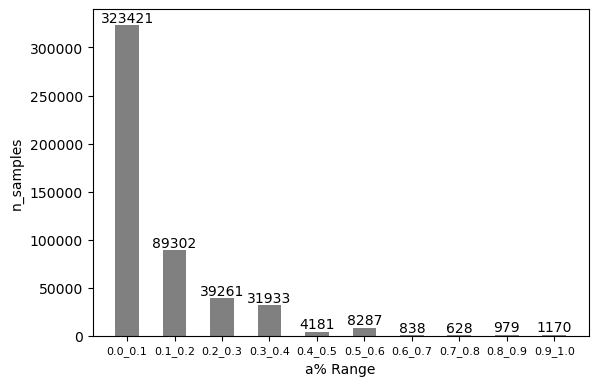

In [16]:
plot_data_distribution(augm_test, 'a%')

In [17]:
test_augmented = augment_interval(test_6, augm_test, 0.3,0.4, 2_790)

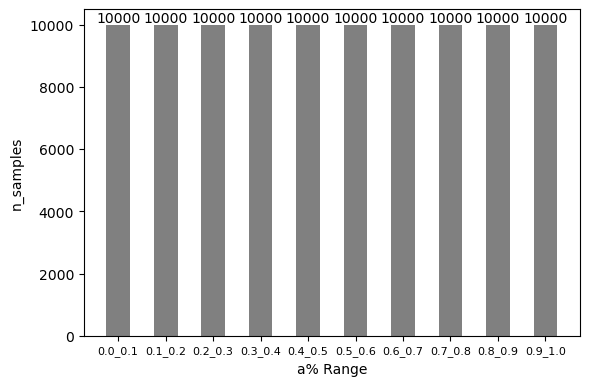

In [18]:
plot_data_distribution(test_augmented, 'a%')

In [19]:
test_augmented.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/test.csv', index=False)

In [ ]:
tg = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/test.csv')
data_augm = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/test_stats_500000.csv')
data_augm['a%'] = data_augm['a%'].fillna(0)
d_0 = data_augm[data_augm['a%']==0]
t_check = d_0.iloc[-2][1:4]
for r in range(tg.shape[0]):
    if ((tg.iloc[r]['r_id']==t_check['r_id']) and (tg.iloc[r]['s_id']==t_check['s_id'])) or ((tg.iloc[r]['r_id']==t_check['s_id']) and (tg.iloc[r]['s_id']==t_check['r_id'])):
        print('nope')
        break
print('ok')
tg.iloc[92616] = d_0.iloc[-2][1:4]
tg.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/test.csv', index=False)

## Fixing broken triples

In [16]:
test_data_filtered = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/test_filtered.csv')
test_data_filtered

,r_id,s_id,a%,total_time
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.030304
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.000382
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.000845
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.000364
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,19.989065
...,...,...,...,...
99565,time_interval_csv_licensed.zip_00-01_16.csv,object_csv_licensed.zip_06-07_390.csv,0.388258,0.003641
99566,running_time_csv_licensed.zip_02-03_303.csv,running_time_csv_licensed.zip_15-16_295.csv,0.309478,0.003602
99567,thing_csv_licensed.zip_03-04_1114.csv,then_csv_licensed.zip_11-12_724.csv,0.355731,0.003522
99568,object_csv_licensed.zip_20-21_158.csv,processing_time_csv_licensed.zip_13-14_215.csv,0.385791,0.004291


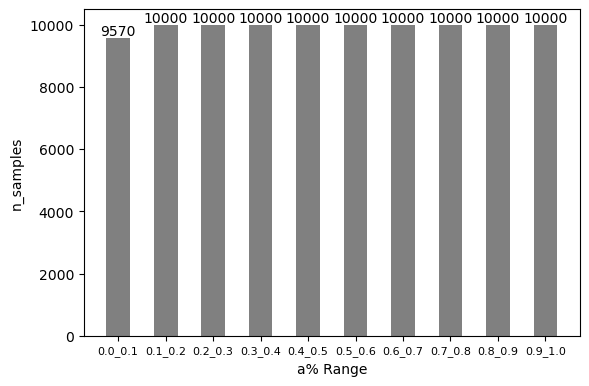

In [17]:
plot_data_distribution(test_data_filtered)

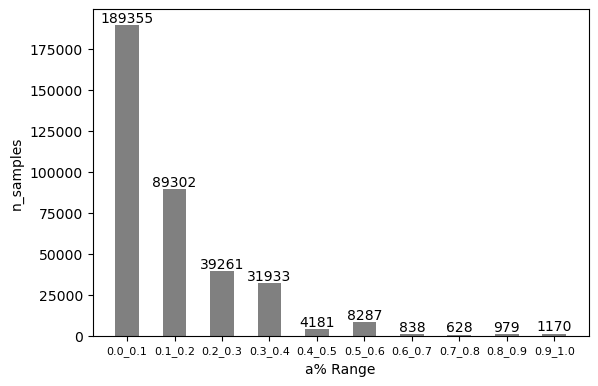

In [18]:
test_data_for_augmentation = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/test_stats_data_augmentation_seeds.csv')
plot_data_distribution(test_data_for_augmentation)

In [19]:
test_data_for_augmentation = drop_duplicate_samples(test_data_filtered, test_data_for_augmentation)

Generating pivot couple set
Generating target couple set
Generating Samples to drop list
Generating rows to drop list
Dropping rows


In [20]:
test_data_for_augmentation = test_data_for_augmentation[test_data_for_augmentation['seeds']==0]
test_data_for_augmentation = test_data_for_augmentation[pd.isna(test_data_for_augmentation['a%'])]
test_data_for_augmentation['a%'] = test_data_for_augmentation['a%'].fillna(0)
test_data_for_augmentation.shape

(133616, 6)

In [21]:
test_data_for_augmentation = test_data_for_augmentation.drop(['id', 'seeds'], axis=1)

In [22]:
test_data_augmented = augment_interval(test_data_filtered, test_data_for_augmentation, 0, 0.1, 430)

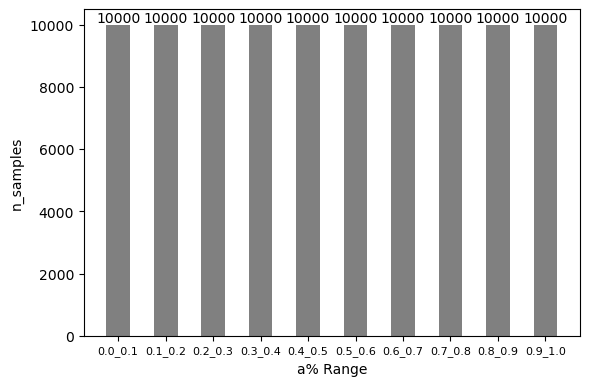

In [23]:
plot_data_distribution(test_data_augmented)

In [24]:
test_data_augmented.iloc[99591]

r_id          in_time_csv_licensed.zip_weatherDataScraped201...
s_id                 growth_rate_csv_licensed.zip_08-09_119.csv
a%                                                          0.0
total_time                                                  NaN
Name: 82172, dtype: object

In [25]:
test_data_augmented.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/test_filtered_augmented.csv', index=False)

## Validation

In [22]:
valid_unbalanced = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/unbalanced_datasets/valid_unbalanced.csv')
valid_unbalanced = valid_unbalanced.drop('total_time', axis=1)
valid_unbalanced['a%'] = valid_unbalanced['a%'].fillna(0)

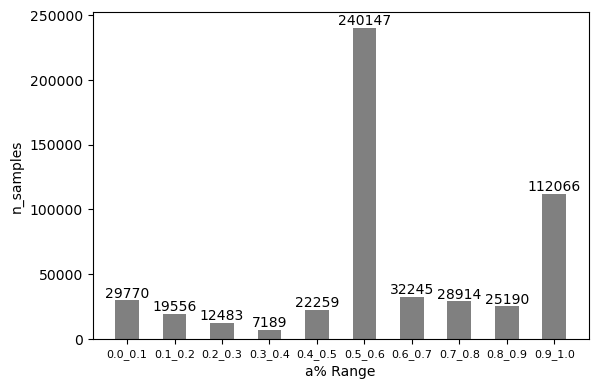

In [23]:
plot_data_distribution(valid_unbalanced, 'a%')

In [24]:
valid_2 = drop_from_interval(valid_unbalanced, 0, 0.1, 19_770)[0]
valid_2 = drop_from_interval(valid_2, 0.1, 0.2, 9_556)[0]
valid_2 = drop_from_interval(valid_2, 0.2, 0.3, 2_483)[0]
valid_2 = drop_from_interval(valid_2, 0.4, 0.5, 12_259)[0]
valid_3 = drop_from_interval(valid_2, 0.5, 0.6, 230_147)[0]
valid_4 = drop_from_interval(valid_3, 0.6, 0.7, 22_245)[0]
valid_5 = drop_from_interval(valid_4, 0.7, 0.8, 18_914)[0]
valid_5 = drop_from_interval(valid_5, 0.8, 0.9, 15_190)[0]
valid_6 = drop_from_interval(valid_5, 0.9, 1, 102_066)[0]

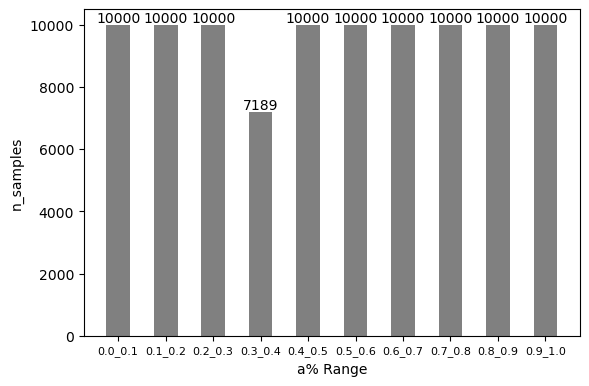

In [25]:
plot_data_distribution(valid_6, 'a%')

Data augmentation

In [26]:
augm_valid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/valid_stats_500000.csv')
augm_valid = augm_valid.drop('total_time', axis=1)
augm_valid = augm_valid.drop('id', axis=1)
augm_valid['a%'] = augm_valid['a%'].fillna(0)
augm_valid = drop_duplicate_samples(valid_6, augm_valid)
augm_valid.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/valid_stats_cleaned.csv', index=False)
augm_valid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/data_augementation_samples/valid_stats_cleaned.csv')

Generating pivot couple set
Generating target couple set
Generating Samples to drop list
Generating rows to drop list
Dropping rows


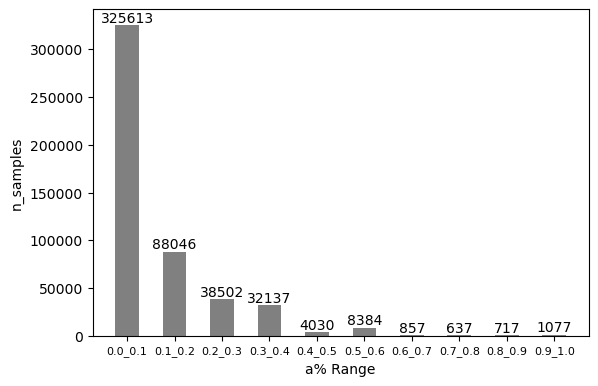

In [27]:
plot_data_distribution(augm_valid, 'a%')

In [28]:
valid_augmented = augment_interval(valid_6, augm_valid, 0.3,0.4, 2_811)

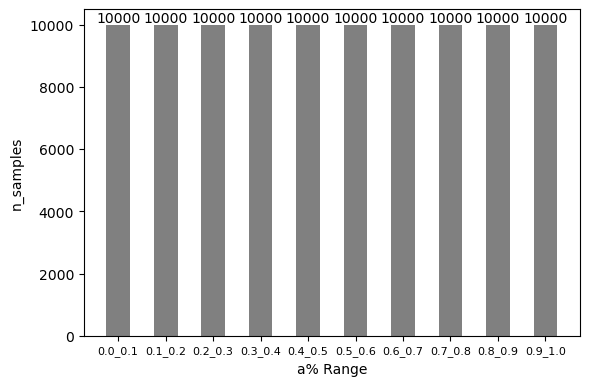

In [29]:
plot_data_distribution(valid_augmented, 'a%')

In [30]:
valid_augmented.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/valid.csv', index=False)

## Fixing broken triples

In [2]:
valid_data_filtered = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/valid_filtered.csv')
valid_data_for_augmentation = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/valid_stats_data_augmentation_seeds.csv')
valid_data_for_augmentation = drop_duplicate_samples(valid_data_filtered, valid_data_for_augmentation)

Generating pivot couple set
Generating target couple set
Generating Samples to drop list
Generating rows to drop list
Dropping rows


In [3]:
valid_data_for_augmentation = valid_data_for_augmentation[valid_data_for_augmentation['seeds']==0]
valid_data_for_augmentation = valid_data_for_augmentation[pd.isna(valid_data_for_augmentation['a%'])]
valid_data_for_augmentation['a%'] = valid_data_for_augmentation['a%'].fillna(0)
valid_data_for_augmentation.shape
valid_data_for_augmentation = valid_data_for_augmentation.drop(['id', 'seeds'], axis=1)

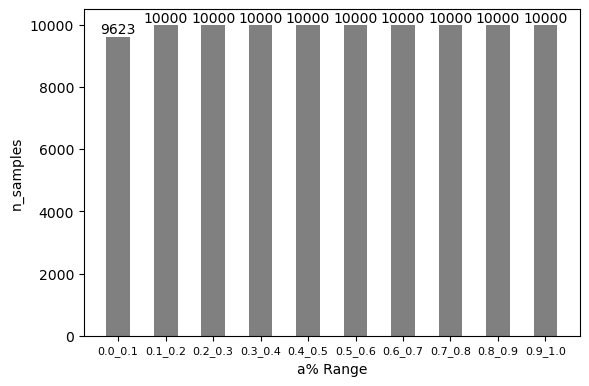

In [5]:
plot_data_distribution(valid_data_filtered)

In [6]:
valid_data_augmented = augment_interval(valid_data_filtered, valid_data_for_augmentation, 0, 0.1, 377)

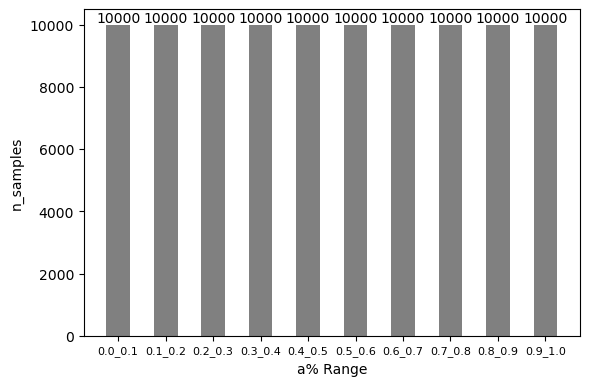

In [7]:
plot_data_distribution(valid_data_augmented)

In [8]:
valid_data_augmented.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/valid_filtered_augmented.csv', index=False)

# Results Validation

In [10]:
train = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/train_filtered_augmented.csv')
test = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/test_filtered_augmented.csv')
valid = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/armadillo_corrections/valid_filtered_augmented.csv')

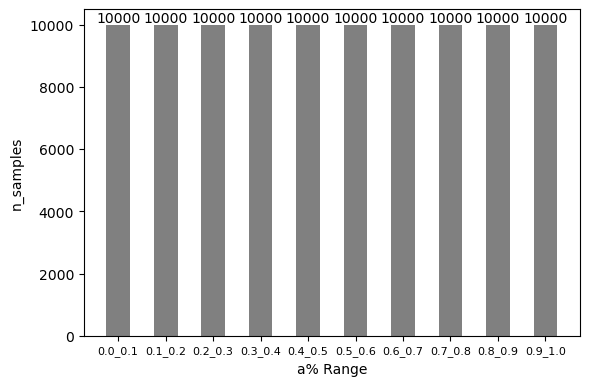

In [11]:
plot_data_distribution(test)

In [12]:
test.head(5)

,r_id,s_id,a%,total_time
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.030304
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.000382
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.000845
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.000364
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,19.989065


In [13]:
valid.head(5)

,r_id,s_id,a%,total_time
0,id_csv_licensed.zip_ir.model.access_37492.csv,id_csv_licensed.zip_ir.model.access_37824.csv,1.000000,0.000401
1,seek_time_csv_licensed.zip_PL2331LAGM42EJ.csv,seek_time_csv_licensed.zip_PL2331LAGN6VUJ.csv,0.526316,0.031017
2,in_time_csv_licensed.zip_KathyBook.csv,running_time_csv_licensed.zip_exercise_2.csv,0.054688,0.058959
3,id_csv_licensed.zip_7254.csv,id_csv_licensed.zip_7301_3.csv,0.250000,0.000720
4,parent_csv_licensed.zip_W99-0623_211.csv,show_time_csv_licensed.zip_W99-0623_swastika_5...,0.727273,0.000879


# Stats Computation

In [19]:
import numbers

def compute_counts(t: pd.DataFrame) -> tuple:
    value_count = {}
    n_nans = 0
    n_str = 0
    n_num = 0
    n_bools = 0

    for r in range(t.shape[0]):
        for c in range(t.shape[1]):
            v = t.iloc[r][c]
            value_count[v] = 0
            if pd.isna(v):
                n_nans += 1
            elif isinstance(v, bool):
                n_bools += 1
            elif isinstance(v, numbers.Number):
                n_num += 1
            else:
                n_str += 1
    return len(value_count.keys()), n_num, n_str, n_nans, n_bools

def compute_table_stats(table_dict: dict | str, outpath: str) -> None:
    if isinstance(table_dict, str):
        with open(table_dict, 'rb') as f:
            table_dict = pickle.load(f)
    new_cols = {
        'table_name':[],
        'n_cols':[],
        'n_rows':[],
        'area':[],
        'n_distinct_values':[],
        'n_numerical':[],
        'n_textual':[],
        'n_nans':[],
        'n_bools':[]
    }

    for k in tqdm(table_dict.keys()):
        t = table_dict[k]
        rows = t.shape[0]
        cols = t.shape[1]
        area = rows * cols
        n_distinct_values, n_numerical, n_textual, n_nans, n_bools = compute_counts(t)
        new_cols['table_name'].append(k)
        new_cols['n_cols'].append(cols)
        new_cols['n_rows'].append(rows)
        new_cols['area'].append(area)
        new_cols['n_distinct_values'].append(n_distinct_values)
        new_cols['n_numerical'].append(n_numerical)
        new_cols['n_textual'].append(n_textual)
        new_cols['n_nans'].append(n_nans)
        new_cols['n_bools'].append(n_bools)
    
    out = pd.DataFrame(new_cols)
    out.to_csv(outpath)
    print(out.describe())


In [27]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_dict_796970_good.pkl','rb') as f:
    table_dict = pickle.load(f)

In [28]:
compute_stats(table_dict, '/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/gittables_stats.csv')

  0%|          | 0/796970 [00:00<?, ?it/s]/tmp/ipykernel_20809/304513725.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  v = t.iloc[r][c]
  0%|          | 301/796970 [00:13<9:44:23, 22.72it/s] 


KeyboardInterrupt: 

# Tests

In [16]:
# ag_train = get_table_set(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/train.csv'))
# ag_test = get_table_set(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/test.csv'))
# ag_valid = get_table_set(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/balanced_datasets/valid.csv'))
ag_train = get_table_set(train)
ag_test = get_table_set(test)
ag_valid = get_table_set(valid)

100%|██████████| 100000/100000 [00:06<00:00, 15144.38it/s]


In [17]:
check_no_repetitions(ag_train, ag_test)

100%|██████████| 161893/161893 [00:00<00:00, 2969962.46it/s]


False

In [18]:
check_no_repetitions(ag_train, ag_valid)

100%|██████████| 161893/161893 [00:00<00:00, 3015157.11it/s]


False

In [19]:
check_no_repetitions(ag_valid, ag_test)

100%|██████████| 47307/47307 [00:00<00:00, 2928016.10it/s]


False

# Wikitables

## Train

In [2]:
train_df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/lsh_candidates/train_stats_2000000.csv')

In [14]:
train_df['total_time'].isna().sum()

0

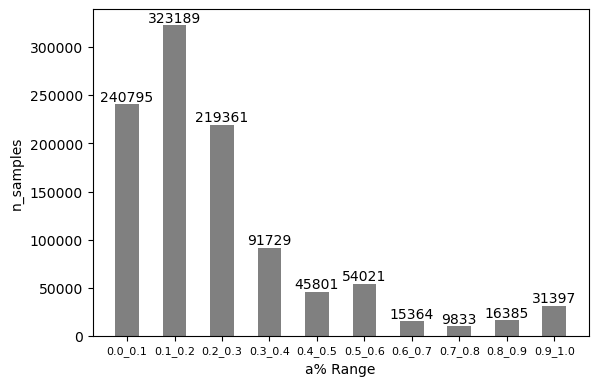

In [5]:
plot_data_distribution('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/lsh_candidates/train_stats_2000000.csv')

## Test

In [3]:
test_df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/lsh_candidates/test_stats_750000.csv')

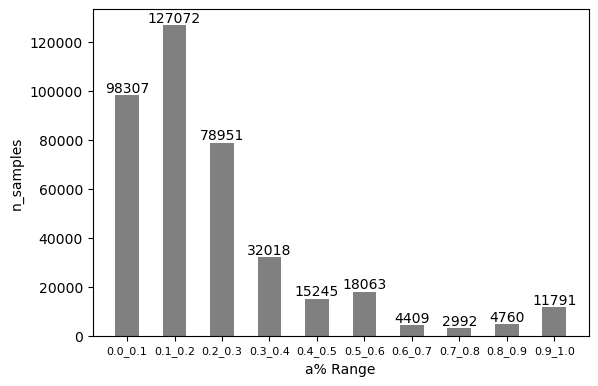

In [6]:
plot_data_distribution('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/lsh_candidates/test_stats_750000.csv')

## Valid

In [9]:
valid_df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/lsh_candidates/valid_stats_750000.csv')

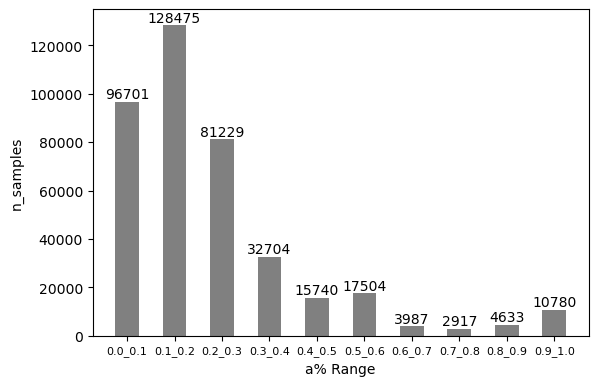

In [7]:
plot_data_distribution('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/lsh_candidates/valid_stats_750000.csv')